<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Материалы" data-toc-modified-id="Материалы-1">Материалы</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-2">Описание данных</a></span></li><li><span><a href="#1-Получение-и-обработка-данных" data-toc-modified-id="1-Получение-и-обработка-данных-3">1 Получение и обработка данных</a></span></li><li><span><a href="#2-Исследовательский-анализ-данных" data-toc-modified-id="2-Исследовательский-анализ-данных-4">2 Исследовательский анализ данных</a></span></li><li><span><a href="#3-Работа-с-гипотезами" data-toc-modified-id="3-Работа-с-гипотезами-5">3 Работа с гипотезами</a></span><ul class="toc-item"><li><span><a href="#3.1-Гипотеза-об-уровне-доходов-клиентов" data-toc-modified-id="3.1-Гипотеза-об-уровне-доходов-клиентов-5.1">3.1 Гипотеза об уровне доходов клиентов</a></span></li><li><span><a href="#3.2-Гипотеза-о-возрасте-клиентов" data-toc-modified-id="3.2-Гипотеза-о-возрасте-клиентов-5.2">3.2 Гипотеза о возрасте клиентов</a></span></li></ul></li><li><span><a href="#4-Выводы" data-toc-modified-id="4-Выводы-6">4 Выводы</a></span></li></ul></div>

# Анализ оттока клиентов

## Материалы
* [Презентация](https://disk.yandex.ru/i/IQWv64N_V7EqLg)
* [Дашборд](https://public.tableau.com/views/Bank_churn_16530614679460/Dashboard?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link)

## Описание данных

**Задача:**

Проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка «Метанпром». Банк располагается в Ярославле и областных городах: Ростов Великий и Рыбинск.

Колонки:

- `userid` — идентификатор пользователя,
- `score` — баллы кредитного скоринга,
- `City` — город,
- `Gender` — пол,
- `Age` — возраст,
- `Objects` — количество объектов в собственности,
- `Balance` — баланс на счёте,
- `Products` — количество продуктов, которыми пользуется клиент,
- `CreditCard` — есть ли кредитная карта,
- `Loyalty` — активный клиент,
- `estimated_salary` — заработная плата клиента,
- `Churn` — ушёл или нет.

## 1 Получение и обработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
import matplotlib.pyplot as plt

In [2]:
sns.set_palette('muted')
sns.set_style('darkgrid')

In [3]:
data = pd.read_csv('bank_dataset.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Датасет на 10 000 записей, типы данных верные, пропуски только в колонке Balance.

Приведем к snake_case наименования колонок датасета.

In [4]:
data.columns = data.columns.str.lower()
data = data.rename(columns={'userid' : 'user_id', 'creditcard' : 'credit_card'})

Проверка на дубликаты

In [5]:
if data.duplicated().sum() == 0:
    print('Дубликаты не обнаружены')
else:
    print(f'Обнаружено дубликатов:{data.duplicated().sum()}')

Дубликаты не обнаружены


Проверка на задвоенные записи

In [6]:
if data.drop('user_id', axis=1).duplicated().sum() == 0:
    print('Дубликаты не обнаружены')
else:
    print(f'Обнаружено дубликатов:{data.drop("user_id", axis=1).duplicated().sum()}')

Дубликаты не обнаружены


In [7]:
data[data['balance'].isna()]

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0
9992,15699841,726,Рыбинск,М,36,2,NaN,1,1,0,195192.40,0
9994,15762030,800,Ярославль,Ж,29,2,NaN,2,0,0,167773.55,0
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0


Количетсво пропусков большое - 3617. Никакой общей картины для записей с NaN в балансе не проглядывается, при этом, в датасете отсутсвуют записи о нулевом балансе. Посмотрим на пропуски в разрезе признаков:

In [8]:
data_na = data.copy()
data_na['nan'] = np.where(data.balance.isna(), 1, 0)
for column in data_na.columns.drop({'user_id', 'balance', 'score', 'age', 'estimated_salary', 'nan'}):
    print(data_na.groupby([column, 'nan']).agg({'user_id':'count'}))

                    user_id
city           nan         
Ростов Великий 0       2509
Рыбинск        0       1278
               1       1199
Ярославль      0       2596
               1       2418
            user_id
gender nan         
Ж      0       2889
       1       1654
М      0       3494
       1       1963
             user_id
objects nan         
0       0        276
        1        137
1       0        686
        1        349
2       0        666
        1        382
3       0        657
        1        352
4       0        620
        1        369
5       0        638
        1        374
6       0        600
        1        367
7       0        642
        1        386
8       0        662
        1        363
9       0        624
        1        360
10      0        312
        1        178
              user_id
products nan         
1        0       4179
         1        905
2        0       1990
         1       2600
3        0        168
         1         98
4   

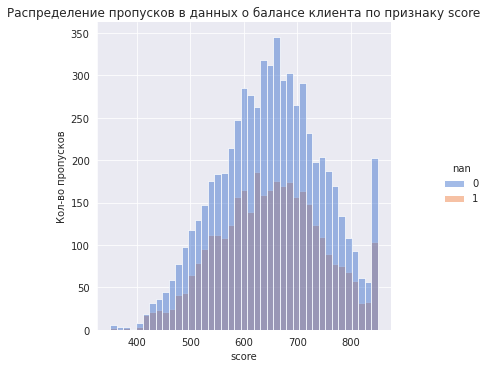

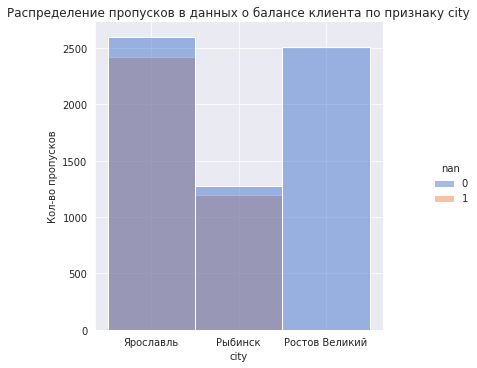

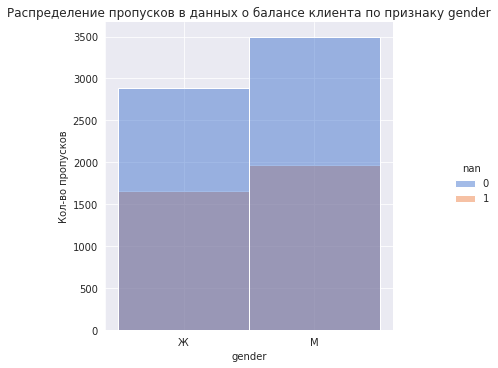

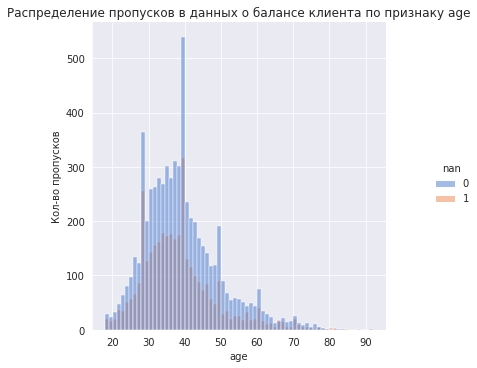

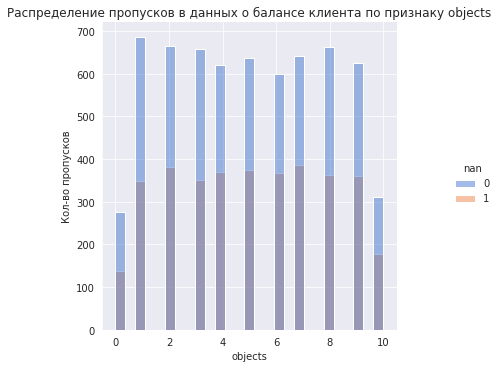

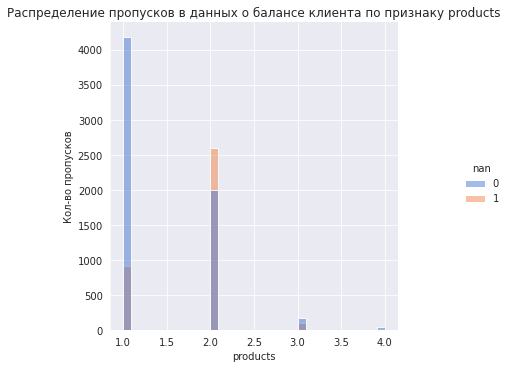

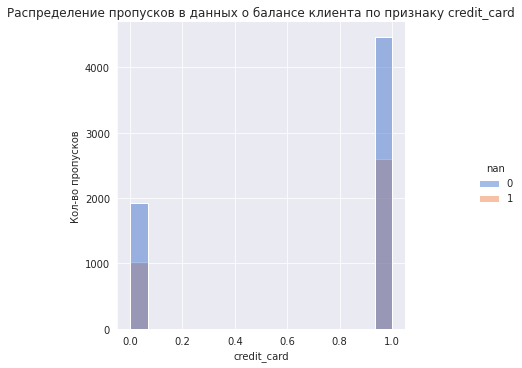

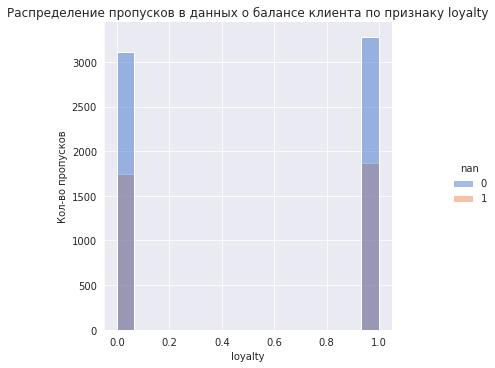

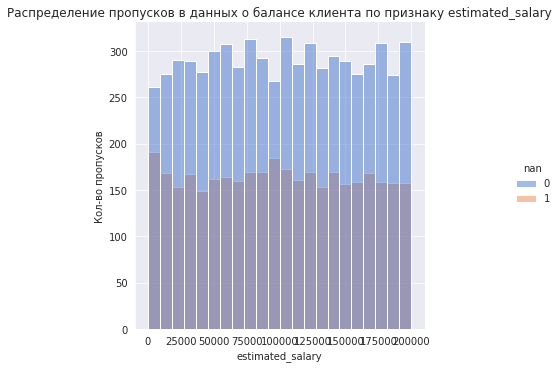

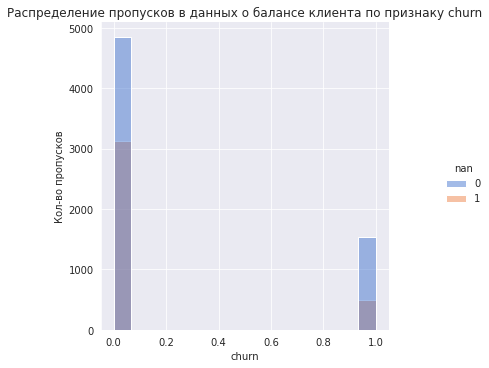

In [9]:
for column in data_na.columns.drop({'user_id', 'balance', 'nan'}):
    sns.displot(data_na, x=column, hue='nan')
    plt.title(f'Распределение пропусков в данных о балансе клиента по признаку {column}')
    plt.ylabel('Кол-во пропусков')
    plt.show()

Пропуски только у клиентов из Рыбинска и Ярославля, какой-то сбой в этих отделениях? Распределение пропусков по гендеру, кол-ву объектов недвижимости, активности - не подозрительное. Больше пропусков в 2,5 раза у держателей кредиток - возможно, клиенты не пользуются депозитными продуктами и пропуск говорит о нулевом балансе? Также пропуски у 500 клиентов из оттока. Больше всего пропусков у тех, кто использует 2 продукта - 2600. Проверим, соответсвуют ли они держателям кредиток - их схожее кол-во.

In [10]:
data_na.query('nan == 1 & credit_card == 1 & products == 2')

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn,nan
6,15635267,822,Ярославль,М,50,7,NaN,2,1,1,10062.80,0,1
11,15779909,497,Рыбинск,М,24,3,NaN,2,1,0,76390.01,0,1
12,15675000,476,Ярославль,Ж,34,10,NaN,2,1,0,26260.98,0,1
14,15643618,635,Рыбинск,Ж,35,7,NaN,2,1,1,65951.65,0,1
17,15830954,549,Рыбинск,Ж,24,9,NaN,2,1,1,14406.41,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9973,15849191,611,Ярославль,М,27,7,NaN,2,1,1,157474.10,0,1
9977,15622705,683,Ярославль,Ж,32,9,NaN,2,1,1,24991.92,0,1
9988,15632065,775,Ярославль,М,30,4,NaN,2,1,0,49337.84,0,1
9989,15648358,841,Рыбинск,М,28,4,NaN,2,1,1,179436.60,0,1


Половина пропусков принадлежит клиентам с двумя продуктами, один из которых - кредитка.

Явной взаимосвязи между пропусками и дургими признаками клиентов выявить не удалось, заполнить все нулями было бы не совсем правильно, т.к. это довольно большой кусок датасета и эта замена исказит распределение известных нам данных, можно было бы заменить все медианами, но это тоже не самая лучшая идея, т.к. нам достоверно неизвестно, чем вызваны пропуски в данных, и есть ли на самом деле у всех этих клиентов деньги на счетах. Так как информация о балансе счета не участвует в проверке гипотез, попробуем оставить пропуски, чтобы не рисковать искажением результатов дальнейшего анализа данных.

In [11]:
data.drop('user_id', axis=1).describe()

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Остальные данные выглядят нормально. Привлекает внимание минимальная estimated_salary - нереалистичное значение.

Попробуем разобраться с зарплатой. Откуда такое странное минимальное значение? Сколько еще в датасете таких странных зарплат? МРОТ в Ярославской области составляет 13890р., посмотрим, сколько клиентов получют ниже этой суммы.

In [12]:
data.query('estimated_salary < 13890').sort_values(by='estimated_salary')

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
2362,15833789,709,Ростов Великий,М,45,4,122917.71,1,1,1,11.58,1
9647,15722429,625,Ярославль,М,31,5,NaN,2,0,1,90.07,0
9010,15829199,645,Ростов Великий,Ж,59,8,121669.93,2,0,0,91.75,1
5548,15682398,710,Ярославль,М,38,2,NaN,2,1,0,96.27,0
4989,15645587,629,Ярославль,М,40,9,NaN,1,1,0,106.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4068,15747646,631,Рыбинск,М,23,3,NaN,2,1,0,13813.24,0
3691,15802980,590,Ярославль,Ж,76,5,160979.68,1,0,1,13848.58,0
3749,15718096,427,Ярославль,М,33,8,NaN,1,1,1,13858.95,0
8337,15611255,534,Ярославль,М,41,9,NaN,2,1,0,13871.34,0


694 клиента с доходом ниже МРОТ, это не много. Стоит учесть, что данные о доходе могут быть недостоверные, плюс в доход может считаться не только зарплата, но и соцвыплаты (пенсия/стипендия) или проценты по вкладам. Оставим эти данные как есть.

**Вывод:**

Данные проверены на предмет наличия пропусков (оставили без изменений) и дубликатов (не обнаружено). Наименования столбцов приведены к стандарту snake_case, типы данных указаны верно. Данные готовы к дальнейшему анализу.

## 2 Исследовательский анализ данных

Посмотрим на средние признаков по статусу оттока:

In [13]:
data.drop('user_id', axis=1).groupby(by='churn').mean().round(2)

,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
churn,,,,,,,,
0,651.85,37.41,5.03,119535.86,1.54,0.71,0.55,99738.39
1,645.35,44.84,4.93,120746.97,1.48,0.70,0.36,101465.68


Что видим по средним:

- срединий скоринговый балл слабо отличается
- средний возраст отвалившихся клиентов заметно выше - 45 лет
- количество объектов в собственности +/- одинаковое
- разница в количестве денег на счету минимальная
- среднее количество используемых продуктов банка незначительно различается
- наличие кредитки у обеих групп на одном уровне
- у клиентов оттока ниже показатель активности, что логично
- уровень дохода практически одинаковый

Построим столбчатые гистограммы с накоплением распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

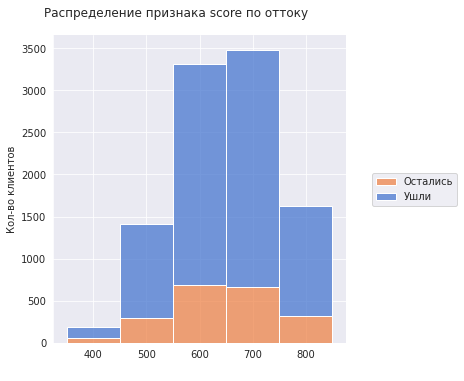

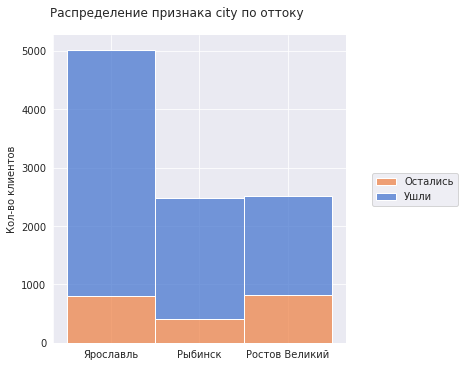

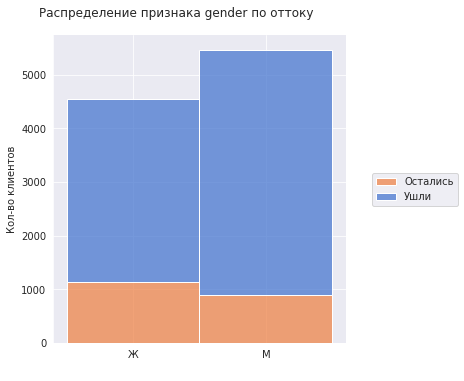

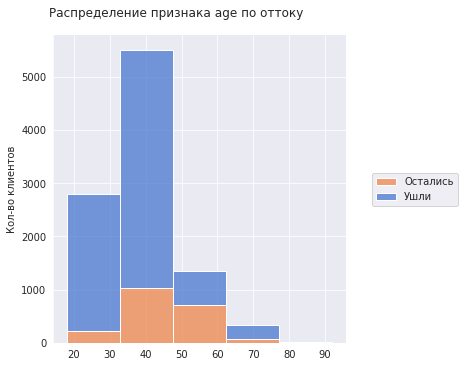

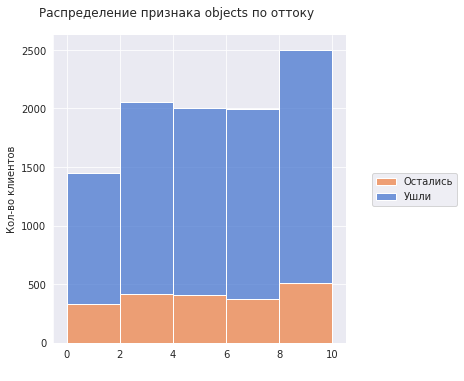

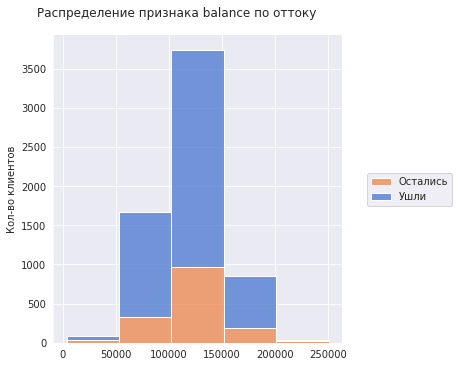

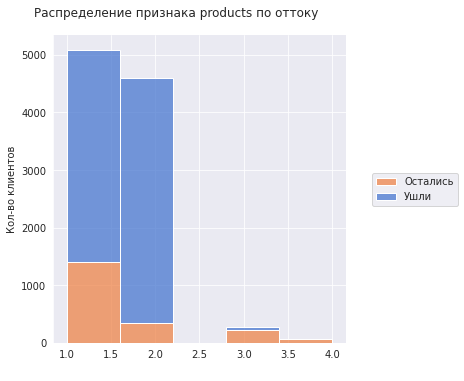

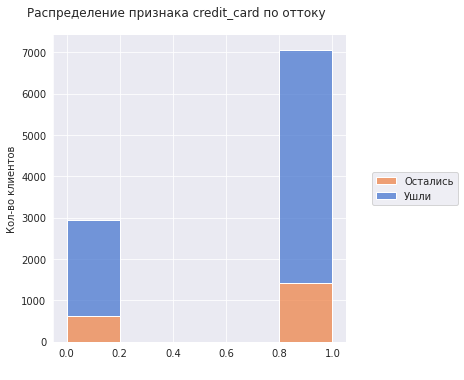

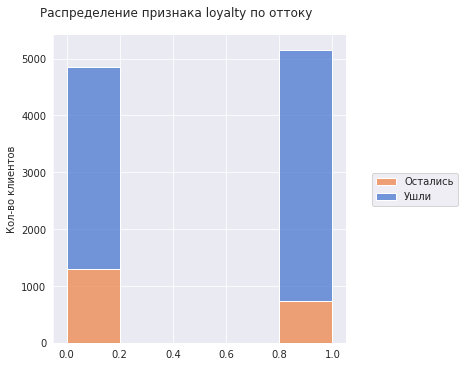

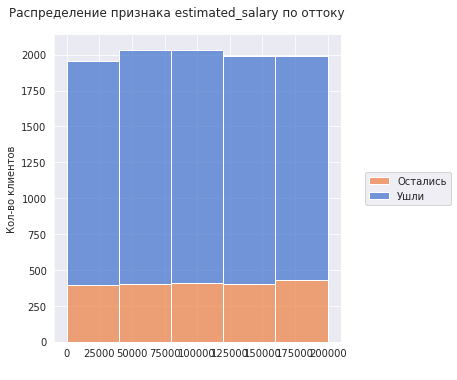

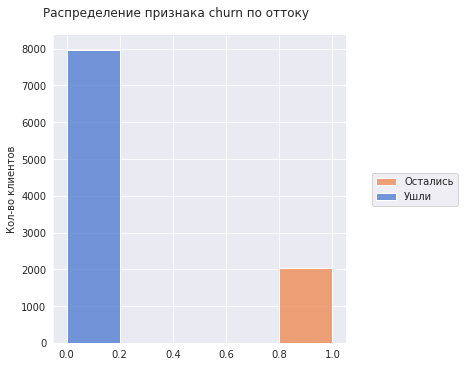

In [14]:
for column in data.columns.drop('user_id'):
    g = sns.displot(data, x=column, bins=5, hue='churn', multiple="stack", legend=False)
    plt.suptitle(f"Распределение признака {column} по оттоку", y=1.05)
    g.set_axis_labels(' ', 'Кол-во клиентов')
    plt.legend({'Ушли', 'Остались'}, loc='right', bbox_to_anchor=(1.4, 0.5))
    plt.show()

Что говорят графики:

- клиенты с низким скорринговым баллом (около 400 и ниже) уходят
- клиенты 45-65 лет чаще уходят
- женщины уходят чаще
- количество объектов в собственности распределено равномерно и ни о чем нам не говорит
- показатель balance распределен нормально
- клиенты, использующие 3-4 продукта уходят, меньше всего оттока среди пользователей 2х продуктов
- наличие кредитки не влияет на отток
- не активные клиенты уходят чаще
- доход клиентов распределен равномерно и не влияет на отток

Изучим распределение по гендеру

In [15]:
(data.groupby('gender')['user_id'].count()/data['user_id'].count()*100)

gender
Ж    45.43
М    54.57
Name: user_id, dtype: float64

Среди клиентов банка больше мужчин - 55%

In [16]:
(data.query('churn==1').groupby('gender')['user_id'].count()/data['churn'].sum()*100).round()

gender
Ж    56.0
М    44.0
Name: user_id, dtype: float64

Отток больше у женщин - 56%

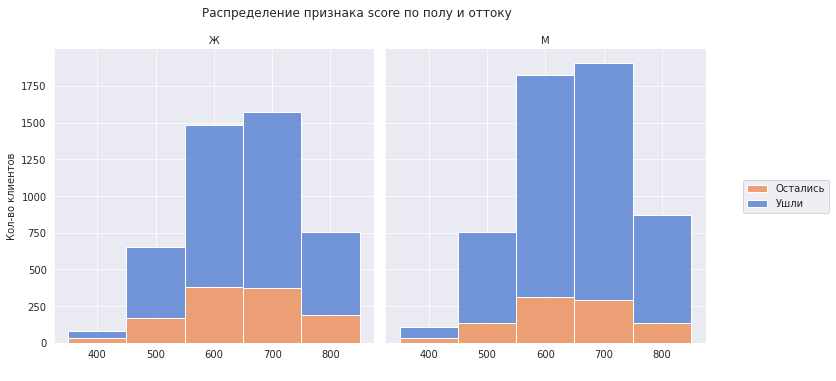

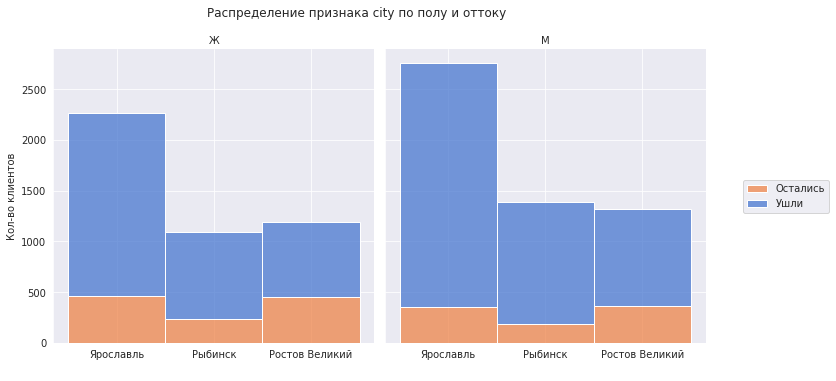

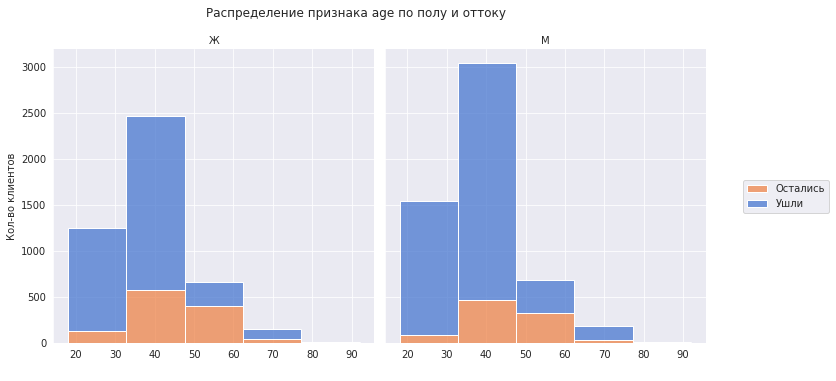

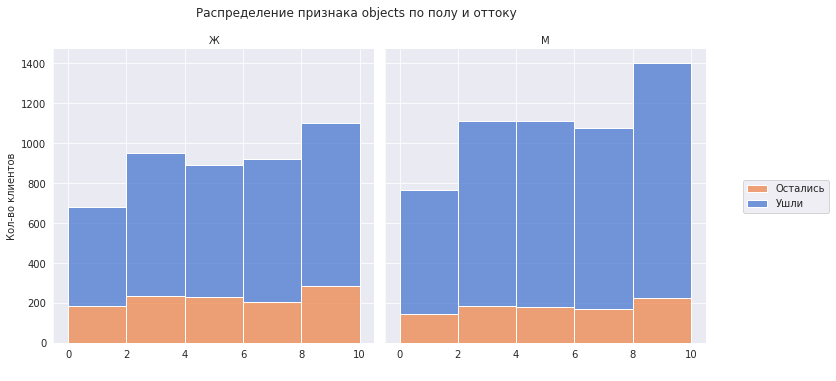

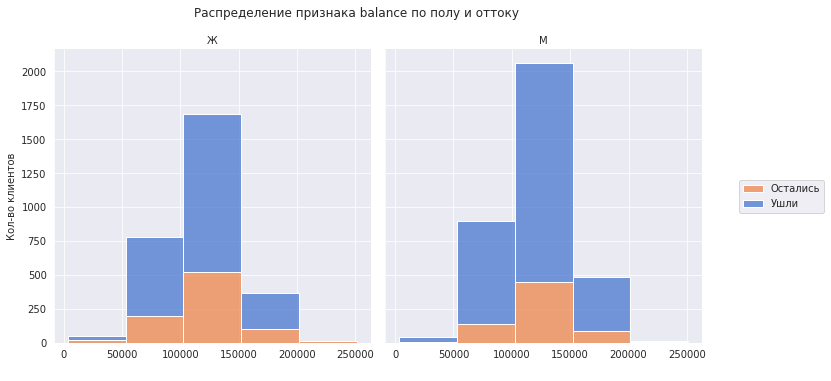

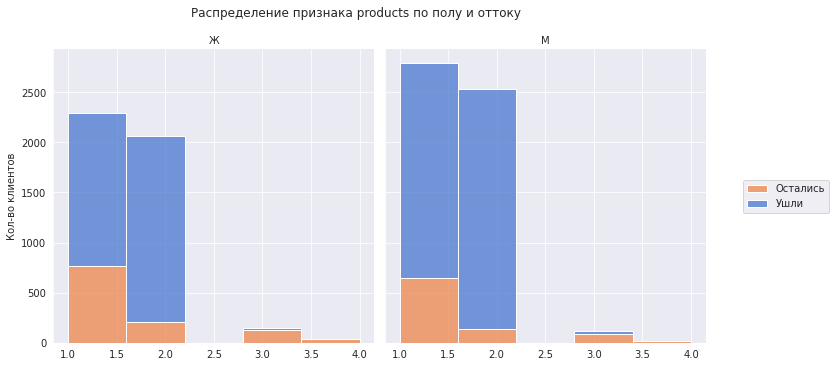

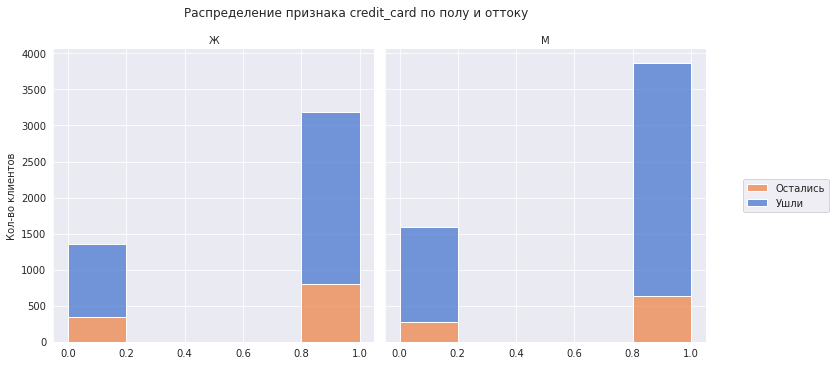

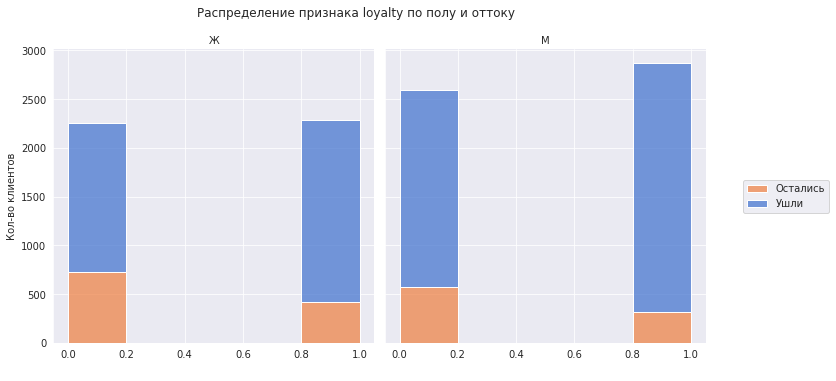

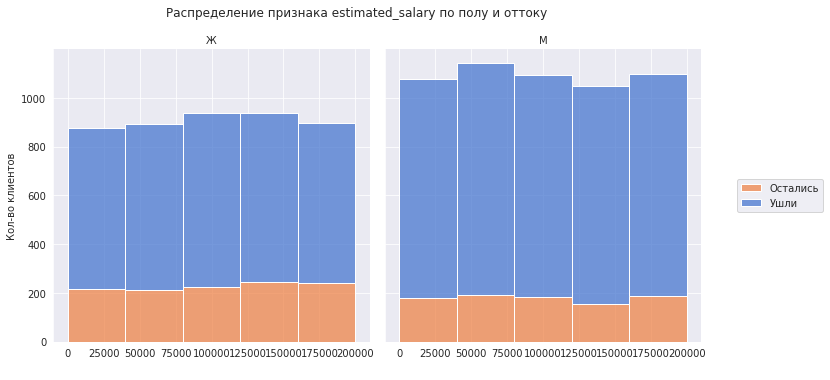

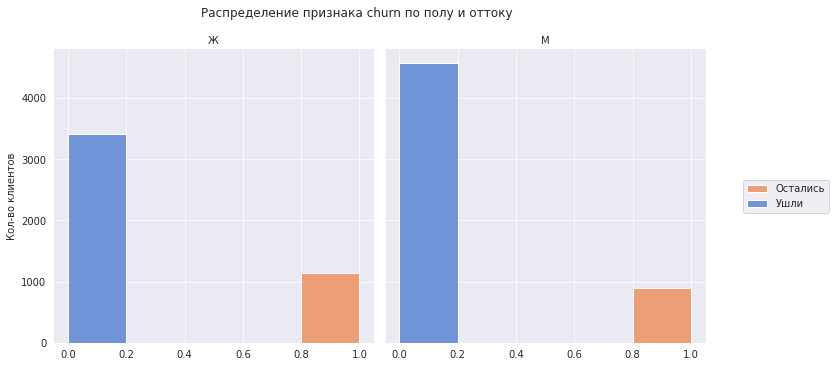

In [17]:
for column in data.columns.drop({'user_id','gender'}):
    g = sns.displot(data, x=column, bins=5, hue='churn', col='gender', multiple="stack", legend=False)
    plt.suptitle(f"Распределение признака {column} по полу и оттоку", y=1.05)
    g.set_titles("{col_name}")
    plt.legend({'Ушли', 'Остались'}, loc='right', bbox_to_anchor=(1.4, 0.5))
    g.set_axis_labels(' ', 'Кол-во клиентов')
    plt.show()

- женщины 45-65 чаще уходят в отток
- женщины с балансом 200 тысяч и более уходят
- женщины, пользующиеся только одним продуктом, чаще уходят
- 1/3 неактивных женщин уходит
- среди мужчин распределение дохода в пике на 50-100 тысячах и 150-175 тыс., у женщин пик на 100-150 тысячах
- в целом среди женщин отток больше

Посмотрим на данные в разрезе городов

In [18]:
data.groupby('city')['user_id'].count()/data['user_id'].count()*100

city
Ростов Великий    25.09
Рыбинск           24.77
Ярославль         50.14
Name: user_id, dtype: float64

В Ростове и Рыбинске количество клиентов примерно одинаковое, в Ярославле в два раза больше.

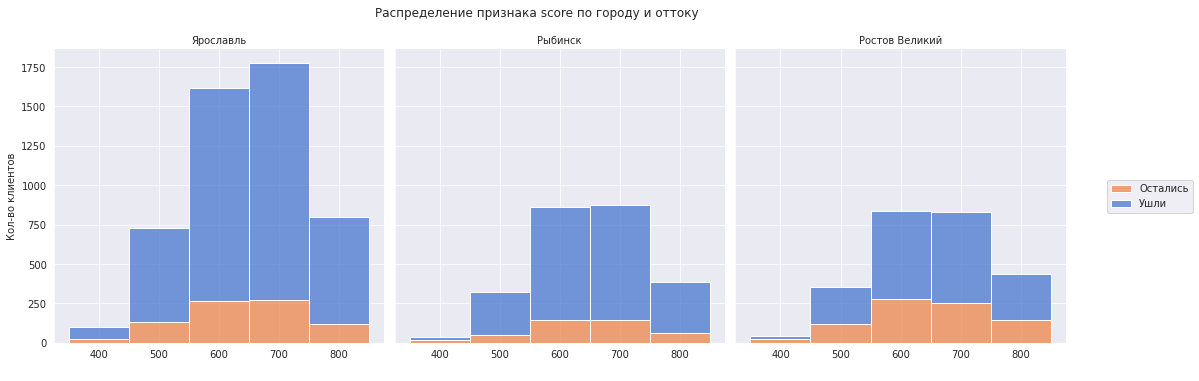

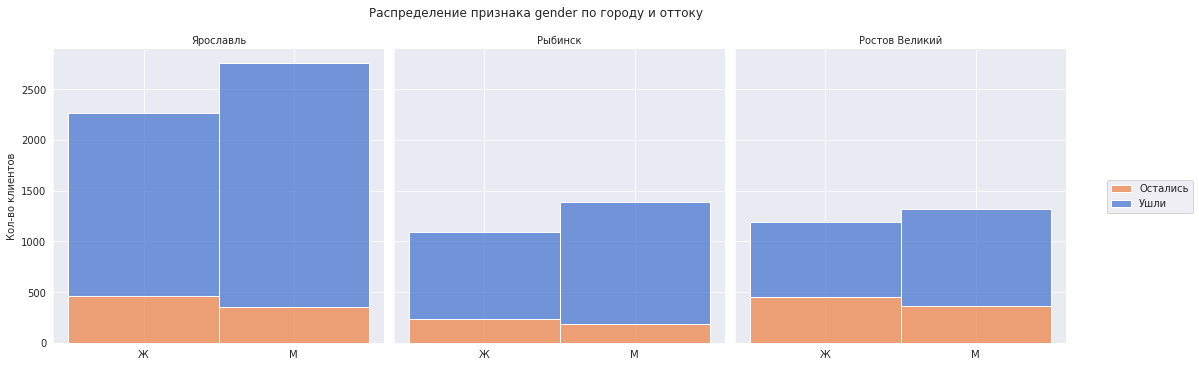

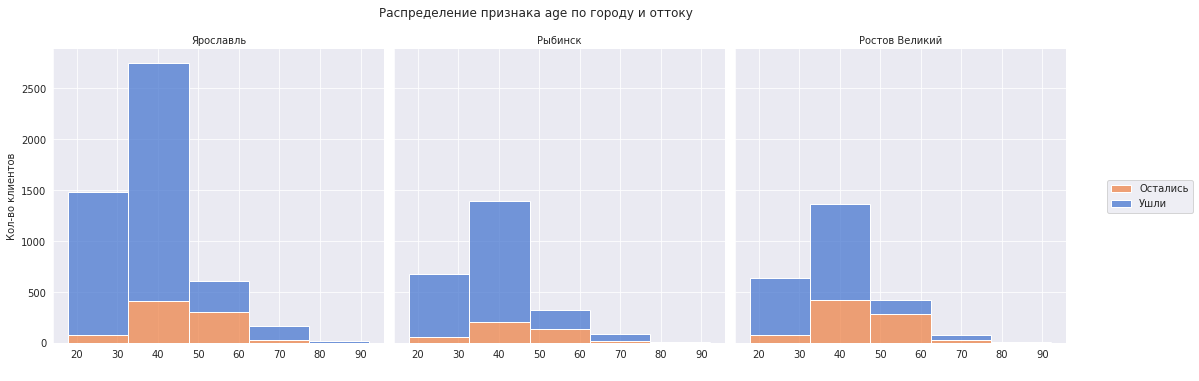

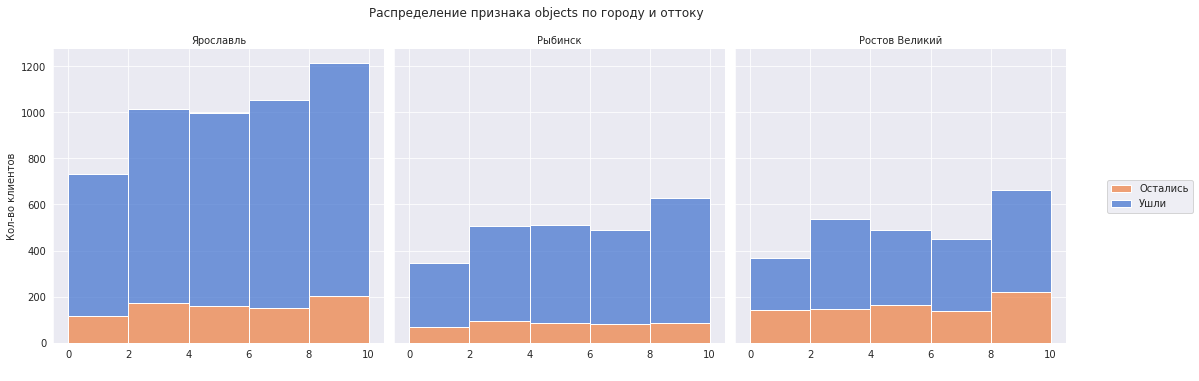

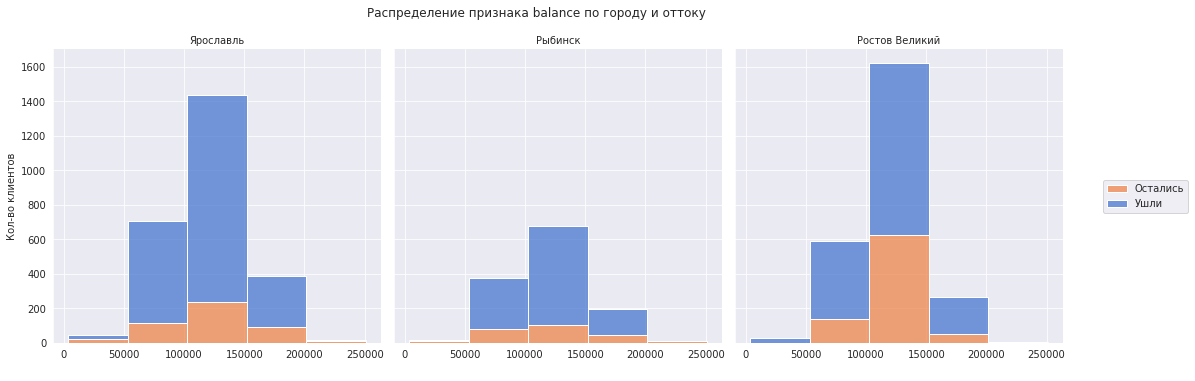

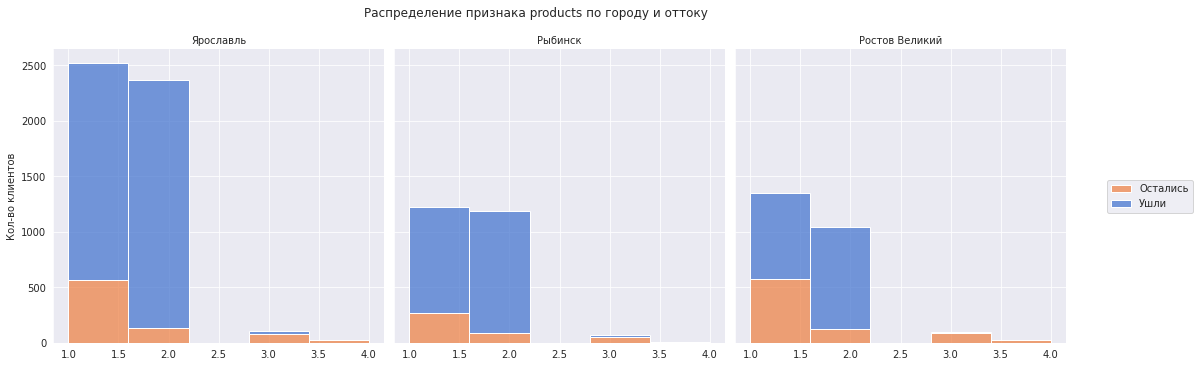

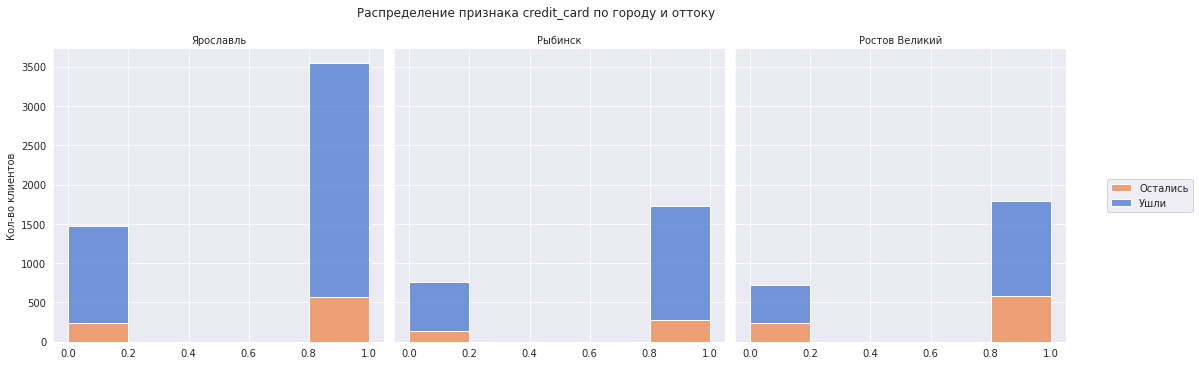

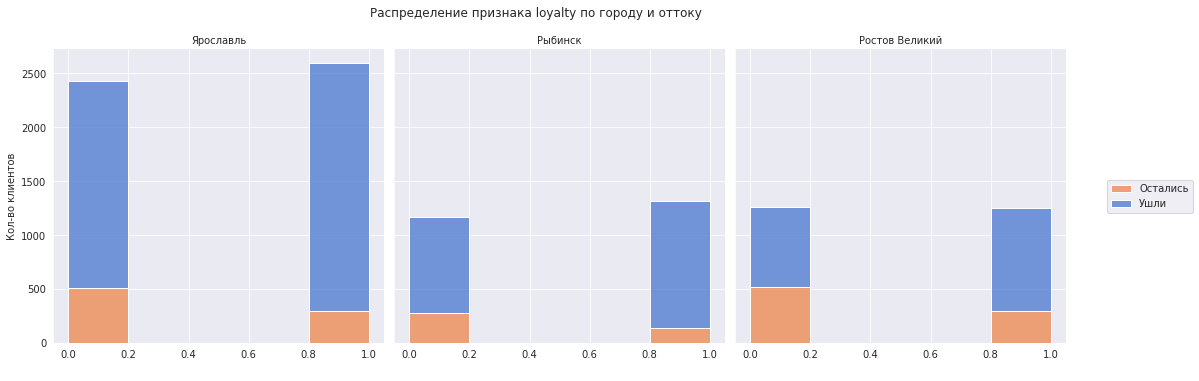

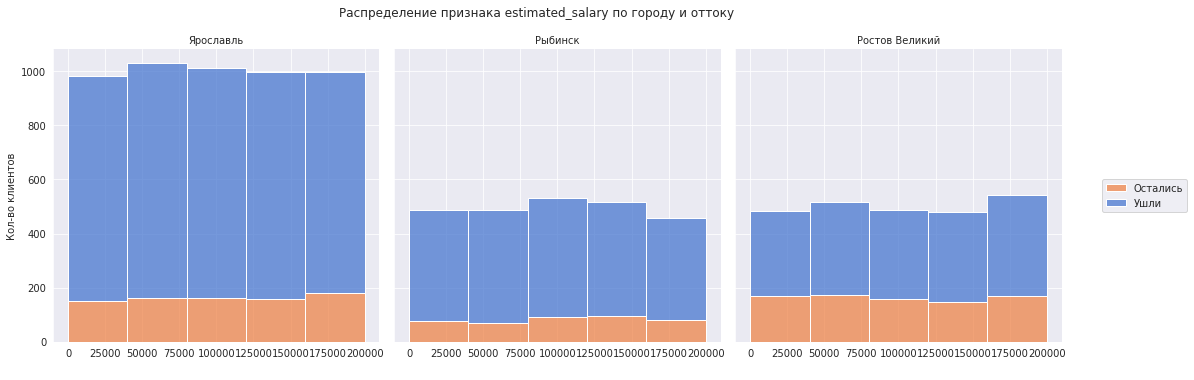

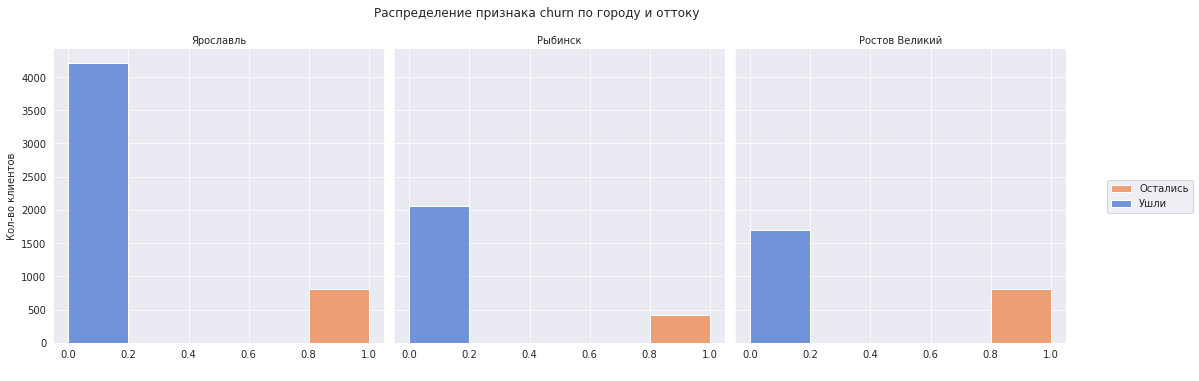

In [19]:
for column in data.columns.drop({'user_id','city'}):
    g = sns.displot(data, x=column, hue='churn', bins=5, col='city', multiple="stack", legend=False)
    plt.suptitle(f"Распределение признака {column} по городу и оттоку", y=1.05)
    g.set_titles('{col_name}')
    plt.legend({'Ушли', 'Остались'}, loc='right', bbox_to_anchor=(1.4, 0.5))
    g.set_axis_labels(' ', 'Кол-во клиентов')
    plt.show()

Что мы видим:

- в Ярославе больше всего клиентов со соринговым баллом 700, в остальных городах клиентов с баллами 600-700 поровну
- в Ростове 2/3 клиентов 50-60 лет и 1/3 клиентов 40 лет уходят, в Ярославле уходит половина из категории 50-60 лет
- в Ростове около 40% клиентов с балансом 100 - 150 тысяч уходят
- более 40% пользователей 1 продукта уходят в Ростове и там же самый большой отток среди пользователей 3-4 продуктов
- более 40% неактивных пользователей в Ростове уходят

Рассмотрим отдельно категорию клиентов 45-65

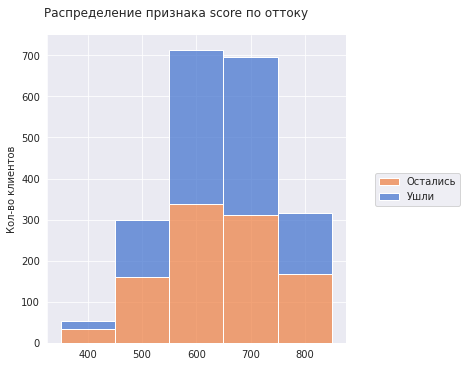

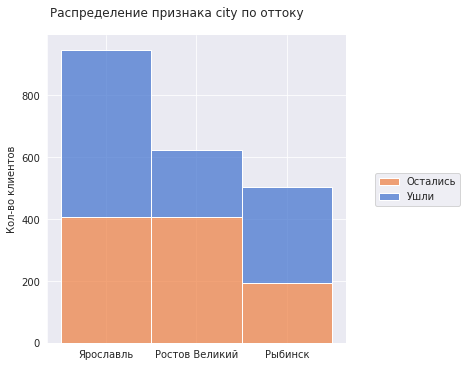

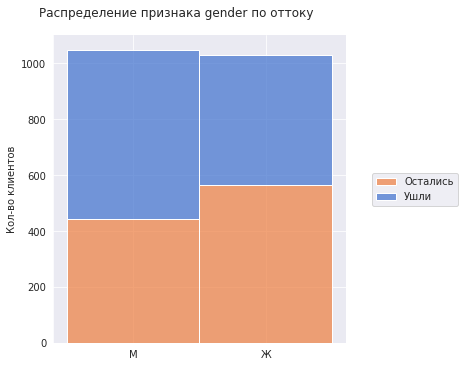

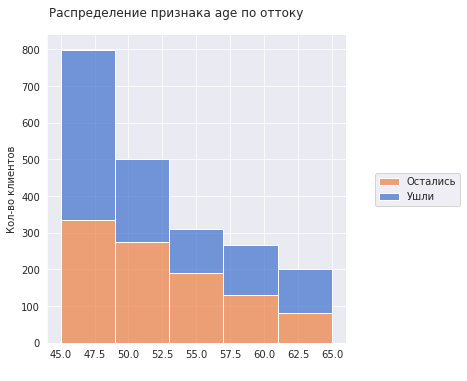

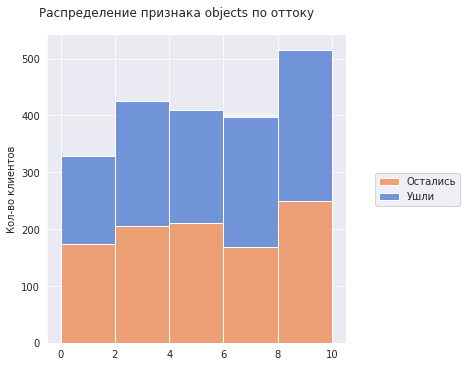

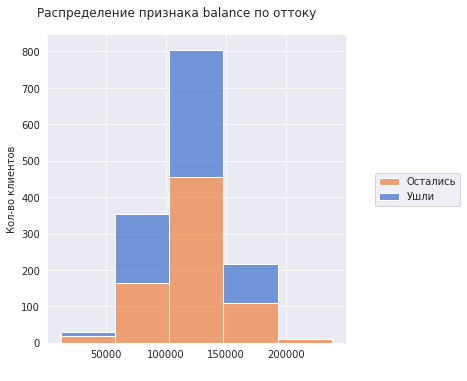

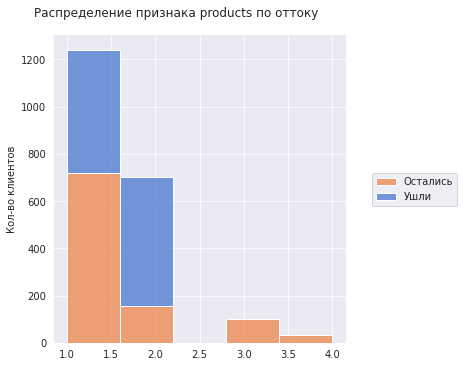

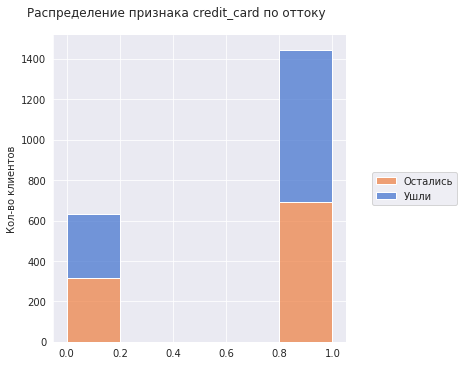

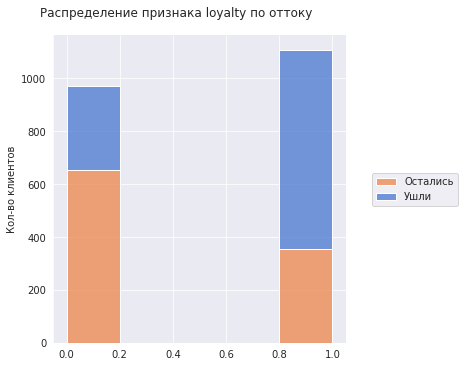

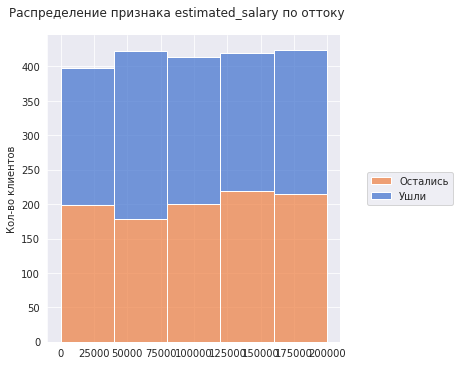

In [20]:
age_data = data.query('45 <= age <= 65')
for column in age_data.columns.drop({'user_id','churn'}):
    g = sns.displot(age_data, x=column, hue='churn', bins=5, multiple="stack", legend=False)
    plt.suptitle(f"Распределение признака {column} по оттоку", y=1.05)
    g.set_titles('{col_name}')
    plt.legend({'Ушли', 'Остались'}, loc='right', bbox_to_anchor=(1.4, 0.5))
    g.set_axis_labels(' ', 'Кол-во клиентов')
    plt.show()

- в Рыбинске отток около 40%, в Ростове 65%, в Ярославле 45%
- женщин уходит больше половины
- с балансом 200 тысяч и более отток 100%
- отток более 50% от пользователей 1 продукта и 100% у 3-4 продуктов
- наличие кредитки не влияет на отток
- неактивные уходят более чем в 60% случаев
- в среднем уходит половина клиентов

Построим матрицу корреляций признаков клиентов:

Для более правильного отображения корреляции закодируем категориальные признаки city и gender

In [21]:
data = pd.get_dummies(data)
data = data.rename(
    columns={'city_Ростов Великий':'rostov_v', 'city_Рыбинск':'rybinsk', 
             'city_Ярославль':'yaroslavl', 'gender_Ж':'female', 'gender_М':'male'})

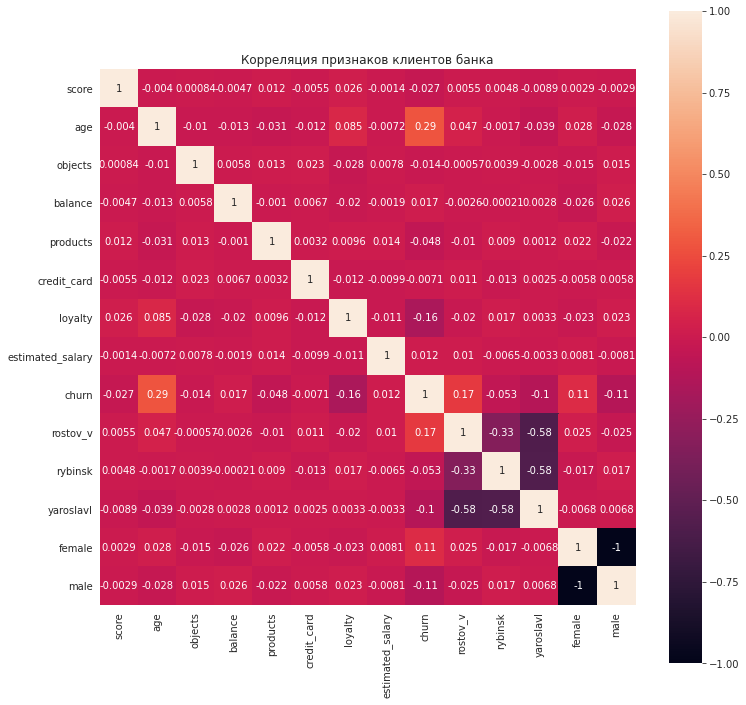

In [22]:
cm = data.drop('user_id', axis=1).corr()
fig, test = plt.subplots()
test.set_title('Корреляция признаков клиентов банка')
fig.set_figheight(12)
fig.set_figwidth(12)
sns.heatmap(cm, annot = True, square=True)
plt.show()

Для оценки тесноты связи примем следующие критерии:
- сильная — r = ±0,7 до ±1
- средняя — r = ±0,3 до ±0,699
- слабая — r = ±0,1 до ±0,299 

Судя по матрице, признаки практически не коррелируют между собой. Слабая положительная корреляция наблюдается между оттоком и возрастом. Слабая отрицательная связь видна у оттока и показателя активности клиента. Интересная, но слабая корреляция оттока по полу - для мужчин отрицательная, для женщин положительная. Слабая положительная корреляция между оттоком и городом Ростов Великий и слабая отрицательная между оттоком и городом Ярославль.

**Вывод:**

Исследовательский анализ данных многое рассказал о клиентах, по результатам анализа можно выделить несколько проблемных сегментов:

клиенты отдлеления в Ростове Великом:
- отток 2/3 среди клиентов 50-60 лет и 1/3 в категории 40 лет
- отток около 40% у клиентов с балансом 100-150 тысяч
- более 40% оттока среди пользователей 1 продукта и почти 100% среди пользователей 3-4 продуктов
- более 40% неактивных пользователей в Ростове уходят

клиенты 45-65:
- с балансом 200 тысяч и более отток 100%
- отток более 50% от пользователей 1 продукта и 100% у 3-4 продуктов
- наличие кредитки не влияет на отток
- неактивные уходят более чем в 60% случаев
- в среднем уходит половина клиентов

также можно выделить как отдельную категорию риска клиентов-женщин:
- высока вероятность оттока после 45 лет
- заметен отток среди женщин с балансом более 200 тысяч
- около 30% женщин, пользующихся только одним продуктом, уходят
- в среднем среди женщин отток в районе 30%

## 3 Работа с гипотезами

### 3.1 Гипотеза об уровне доходов клиентов

Ранее в исследовательском анализе данных мы смотрели на распределение estimated_salary по признаку оттока и выяснили, что оно нормальное, осталось выяснить, равны ли дисперсии в этих группах. Для проверки равенства дисперсий воспользуемся тестом Левене.

In [23]:
alpha = .05
stat, p = st.levene(
    data.query('churn == 0')['estimated_salary'], 
    data.query('churn == 1')['estimated_salary']
)
print(f"p-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

p-значение:0.3379824239075462
Дисперсии равны


Данные прошли проверку на нормальность, дисперсии выборок равны, можно смело использовать t-тест Стьюдента для проверки гипотезы.

Сформулируем нулевую и альтернативную гипотезы:

Н0: у ушедших клиентов средний уровень дохода равен среднему уровню дохода оставшихся

Н1: у ушедших клиентов средний уровень дохода не равен среднему уровню дохода оставшихся

In [24]:
alpha = .05

results = st.ttest_ind(
    data.query('churn == 0')['estimated_salary'], 
    data.query('churn == 1')['estimated_salary']
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.22644042802223346
Не получилось отвергнуть нулевую гипотезу


Вероятность случайно получить равные средние в районе 23%, значит, нулевая гипотеза не может быть отвергнута и можно допустить, что между доходами ушедших и оставшихся клиентов нет ощутимой разницы.

### 3.2 Гипотеза о возрасте клиентов

Нам известно, что данные распределены нормально, проверим дисперсии

In [25]:
alpha = .05
stat, p = st.levene(
    data.query('loyalty == 0')['age'], 
    data.query('loyalty == 1')['age']
)
print(f"p-значение:{p}")
if p < alpha:
    print("Дисперсии не равны")
else:
    print("Дисперсии равны")

p-значение:9.330991406093581e-35
Дисперсии не равны


Дисперсии выборок не равны, значит, при проведении t-теста дополнительно укажем это в параметре equal_var.

Сформулируем нулевую и альтернативную гипотезы:

Н0: у активных клиентов средний возраст равен среднему возрасту неактивных

Н1: у активных клиентов средний возраст не равен среднему возрасту неактивных

In [26]:
alpha = .05

results = st.ttest_ind(
    data.query('loyalty == 0')['age'], 
    data.query('loyalty == 1')['age'], 
    equal_var = False
)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  6.1974275327360384e-18
Отвергаем нулевую гипотезу


Нулевую гипотезу можно отбросить, шанс всего 0,8% случайно встретить клиентов одного возраста среди активной и неактивной групп. Актиные клиенты отличаются по возрасту от неактивных.

## 4 Выводы

Целью исследования было проанализировать клиентов регионального банка и выделить портрет клиентов, которые склонны уходить из банка «Метанпром», а также проверить ряд гипотез относительно имеющихся данных.

В результате исследования удалось выделить несколько риск-сегментов, склонных к оттоку:

клиенты отдлеления в Ростове Великом:
- отток 2/3 среди клиентов 50-60 лет и 1/3 в категории 40 лет
- отток около 40% у клиентов с балансом 100-150 тысяч
- более 40% оттока среди пользователей 1 продукта
- более 40% неактивных пользователей в Ростове уходят

клиенты 45-65:
- с балансом 200 тысяч и более отток 100%
- отток более 50% от пользователей 1 продукта
- наличие кредитки не влияет на отток
- неактивные уходят более чем в 60% случаев
- в среднем уходит половина клиентов

клиенты-женщины:
- высока вероятность оттока после 45 лет
- заметен отток среди женщин с балансом более 200 тысяч
- около 30% женщин, пользующихся только 1 продуктом, уходят
- в среднем среди женщин отток в районе 30%

Также смогли выделить общие признаки клиента, который с большей вероятностью уйдет из банка:

- скоринговый балл около 400 и ниже
- возраст старше 45 лет
- использует 3-4 продукта
- не является активным пользователем

При проверке гипотез не удалось отвергнуть предположение, что доходы ушедших клиентов и оставшихся равны, а гипотезу о равенстве возрастов активных и неактивных клиентов успешно отвергли - с большой вероятностью разница в возрасте есть.

**Рекомендации по удержанию**

Общим признаком для всех клиентов из оттока является использование 1 продукта, при этом, пользователи 2 продуктов являются самыми стабильными клиентами. Поэтому общим лейтмотивом всех рекомендаций для каждой из риск-категорий будет предложение еще одного продукта, но не кредитной карты, так как проведенный ранее анализ показал, что наличие кредитки не влияет на отток. 

Уходящие клиенты Ростова Великого в возресте 40+ лет имеют на балансе 100-150 тысяч, пользуются 1 продуктом и не проявляют активность. Таким клиентам можно предложить вложить деньги на балансе в инвестиции или положить на накопительный счет. Также, можно подумать про кэшбек в популярных в городе магазинах/заведениях, раз проблема оттока наблюдается локально в этом городе.

Клиентов категории 45-65 лет можно попробовать заинтересовать ранней инвестиционной пенсионной программой, целевыми кредитами.

Для женщин можно предложить банальный кэшбек на шоппинг. Также инвестиции или накопительные счета, кредиты.

Для всех риск-категорий рекомендуется провести дополнительные исследования (какие самые частые банковские операции, категории трат и т.д.), чтобы нащупать точки роста и понять, с каким предложением лучше прийти к каждому из сегментов.